In [1]:
import colorstamps
import matplotlib.pyplot as plt
import scipy.interpolate
import numpy as np

In [2]:
names = ['flat',  'peak', 'abyss', 
         #'disk','cone','funnel', 
         'hsv', 'fourCorners', 'fourEdges',
         'orangeBlue', 'greenPurple', 'greenTealBlue', 
         'barrel', 'cut', 'blues', 
         'yellows', 'reds', 'greens',
        ]#'teuling0f', 'teuling1f', 'teuling3f',
         #'teuling0w', 'teuling1w', 'teuling3w']


/home/trygvrad/.local/lib/python3.8/site-packages/colorspacious/ciecam02.py:397: RuntimeWarning: invalid value encountered in power
  * ((27.13 * np.abs(RGBprime_a - 0.1))


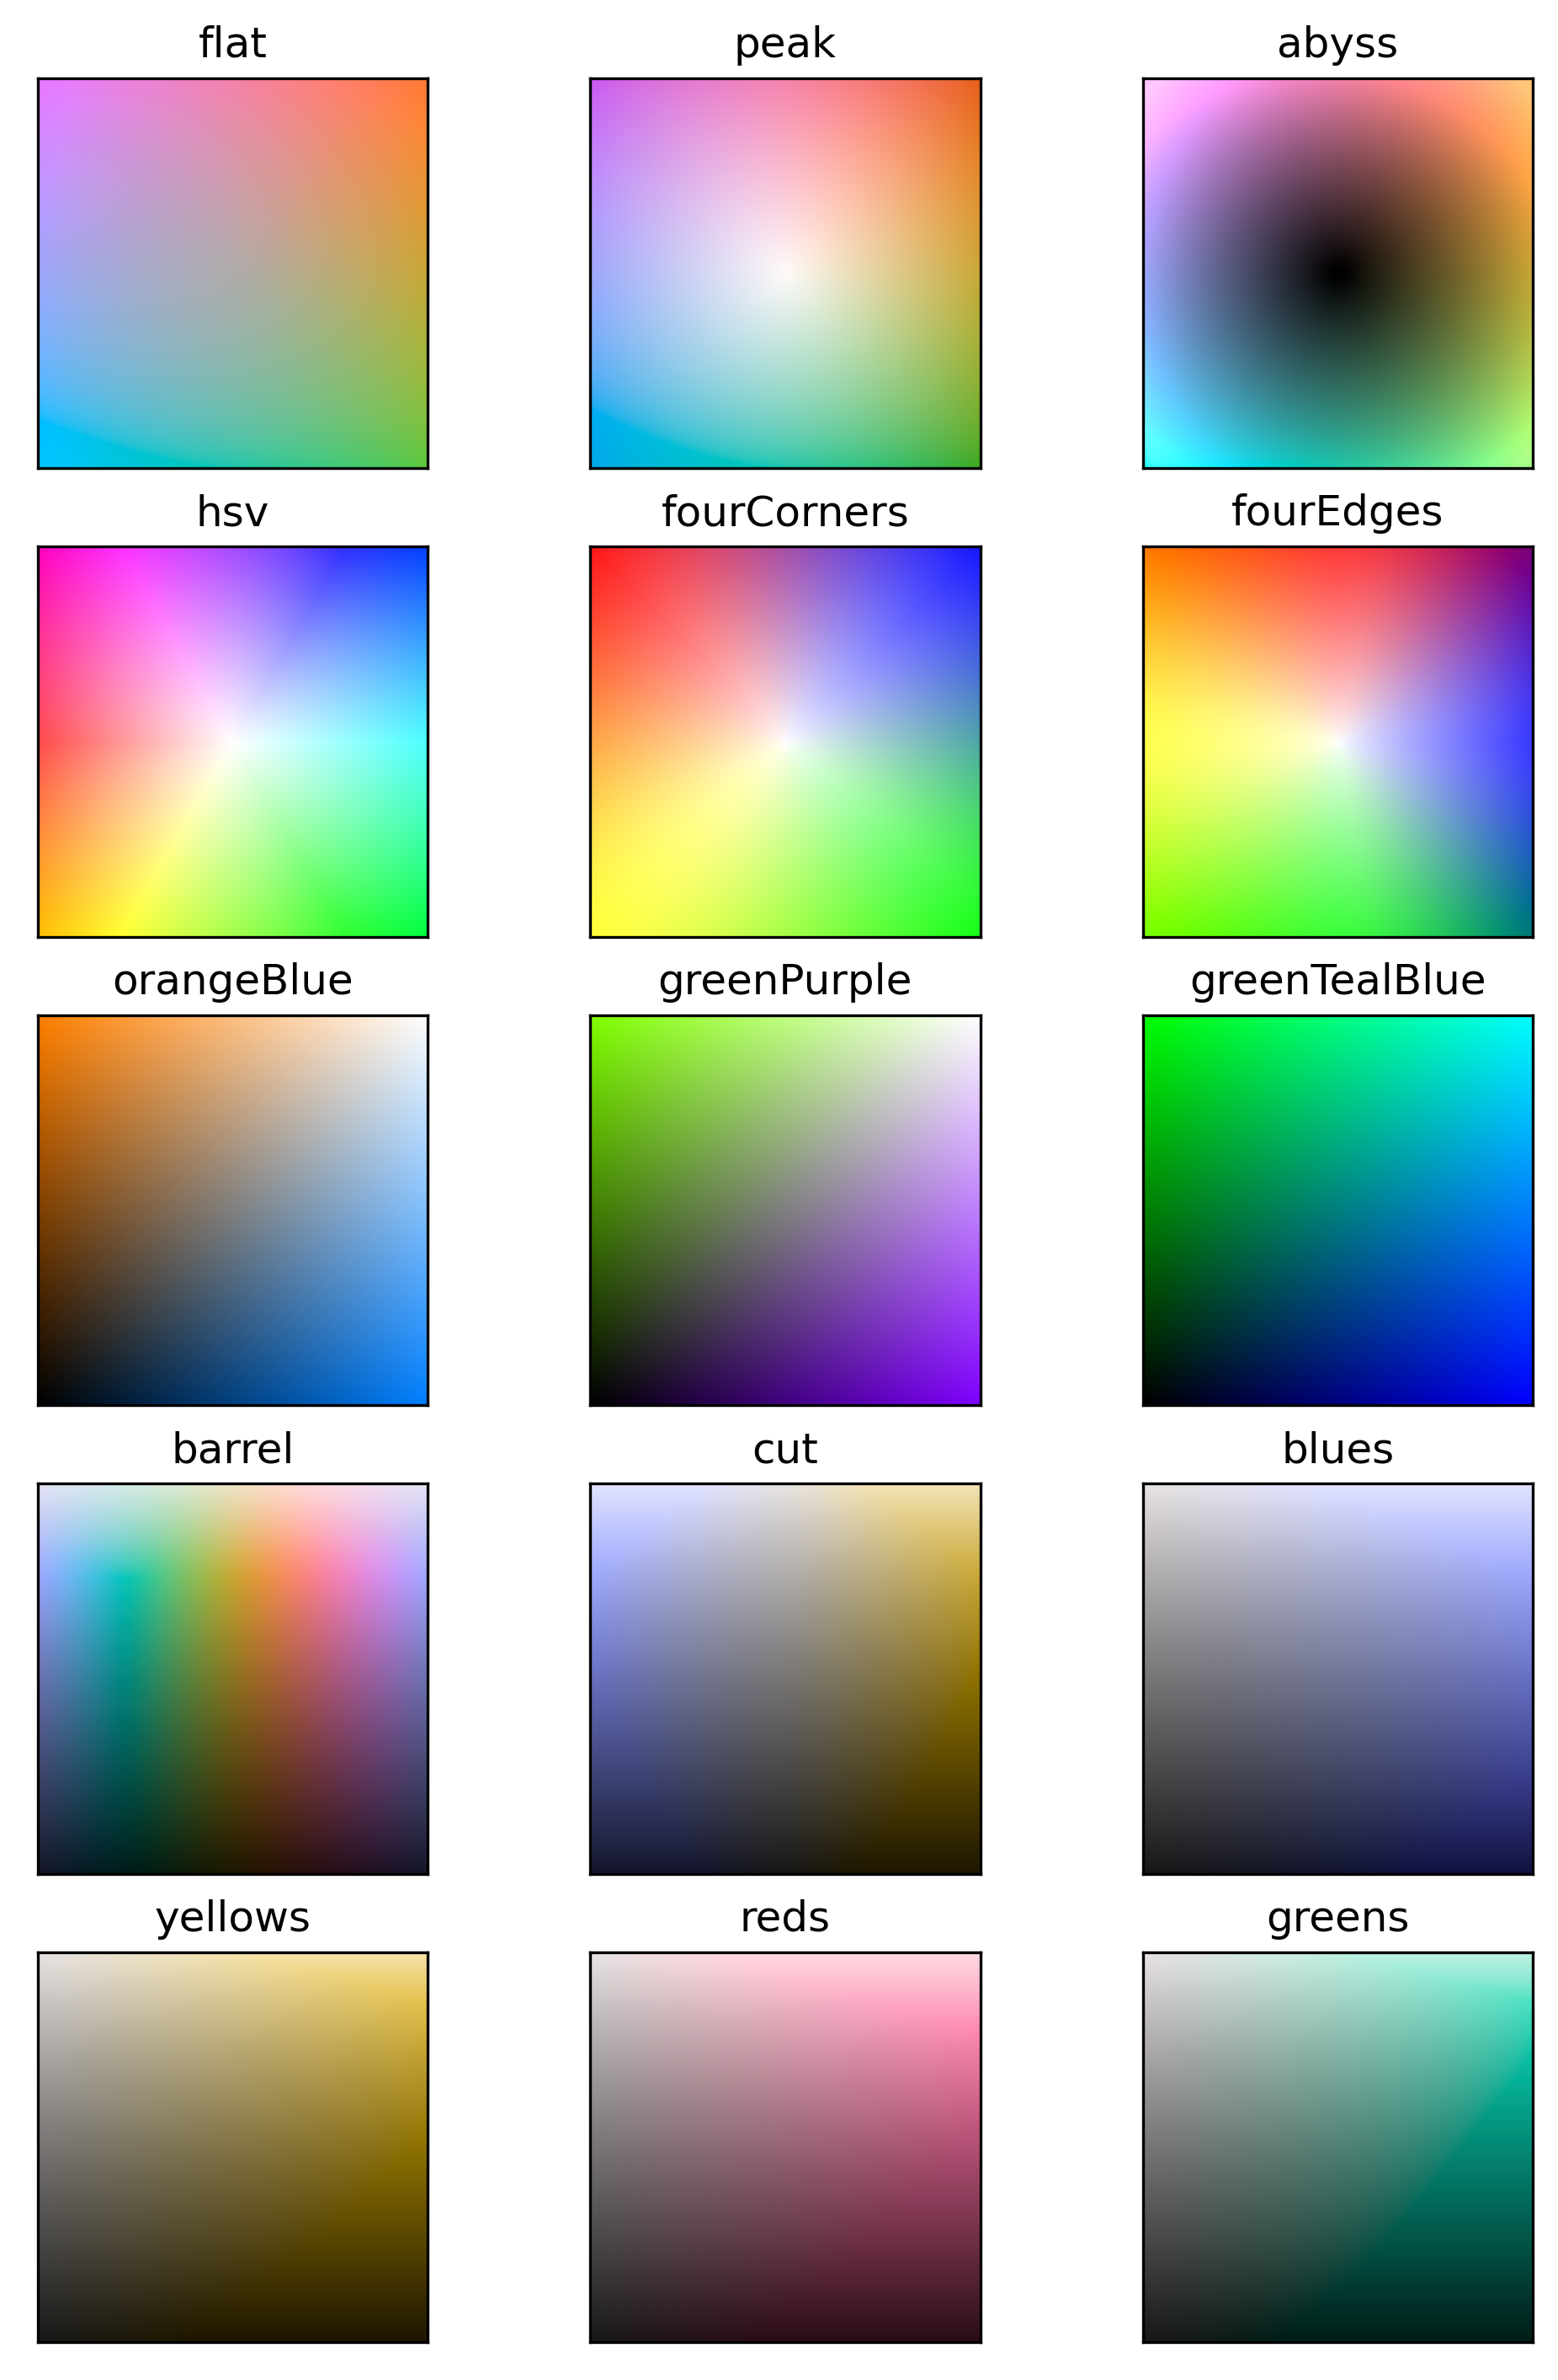

In [3]:
# reference image
fig, axes = plt.subplots(5,3, figsize = (8,19*5/8), dpi = 300)
axes = axes.ravel()

references = []

for i, name in enumerate(names):
    cmap = colorstamps.stamps.get_cmap(name, l = 256)
    axes[i].imshow(cmap, origin = 'lower')
    axes[i].set_title(name)
    references.append(cmap)
    
for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
fig.patch.set_facecolor('white')
fig.savefig(f'Bi_reference.png')

/home/trygvrad/.local/lib/python3.8/site-packages/colorstamps/stamps.py:547: RuntimeWarning: invalid value encountered in true_divide
  fac = 1.2*((np.abs(f0)+np.abs(f1))/np.sqrt(f0**2+f1**2))**-0.3


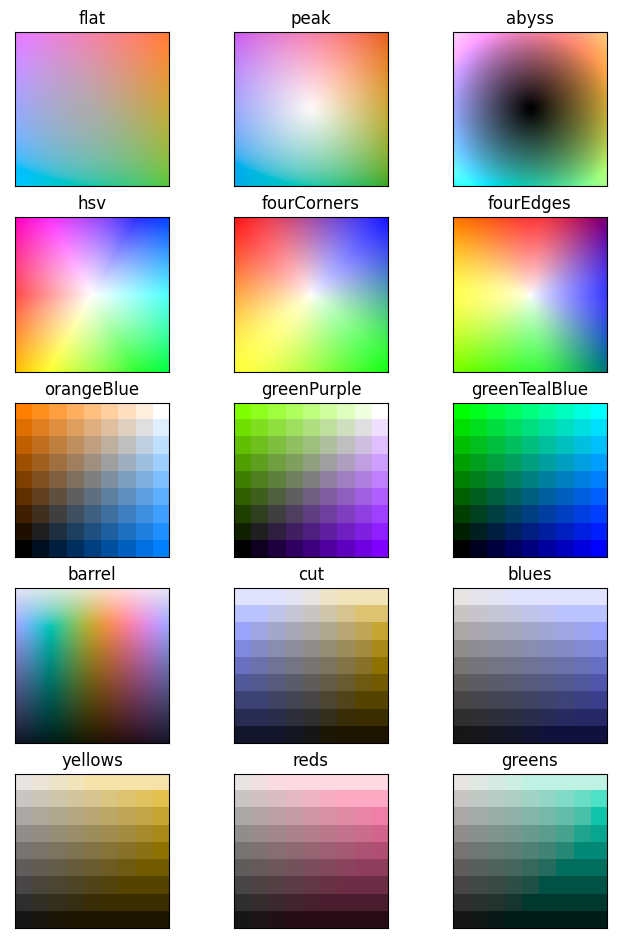

In [4]:
# encoding
fig, axes = plt.subplots(5,3, figsize = (8,19*5/8), dpi = 100)
axes = axes.ravel()

resolutions = [65, 65, 65, 
               65, 65, 65, 
               9, 9, 9,
               65, 9, 9,
               9, 9, 9]
dic = {}
for i, name in enumerate(names):
    l = resolutions[i]
    cmap = colorstamps.stamps.get_cmap(name, l = l)
    #cmap = (cmap*255+0.5).astype(np.uint8)
    axes[i].imshow(cmap, origin = 'lower')
    axes[i].set_title(name)
    dic[name] = cmap
for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
fig.patch.set_facecolor('white')
fig.savefig(f'Bi_encoded_reduced.png')


In [20]:
import datetime
output_string = f'# auto-genreated by https://github.com/trygvrad/multivariate_colormaps\n'
output_string += f'# date: {str(datetime.datetime.today())[:10]}\n\n'

output_string += 'import numpy as np\n'
output_string += 'from matplotlib.colors import SegmentedBivarColormap\n\n'
cmap_names = []
for i, name in enumerate(names):
    l = resolutions[i]
    cmap = colorstamps.stamps.get_cmap(name, l = l).ravel()
    cmap_names.append(f'Bi{name[0].upper()+name[1:]}')
    output_string += f'{cmap_names[-1]} = np.array(\n    ['
    for i in range(len(cmap)):
        if i%10 ==0 and i>0:
            output_string = output_string[:-1] + '\n     '
        output_string += f'{cmap[i]:.3f}, '
    output_string = output_string[:-1]+ f'\n     ]).reshape(({l}, {l}, 3))\n\n'

output_string += 'cmaps = {\n'
for name in cmap_names:
    shape = 'square'
    output_string += f'    "{name}": SegmentedBivarColormap(\n        {name}, "{name}", 256, "square"),\n'
output_string += f'    "BiDisk": SegmentedBivarColormap(BiFlat, "BiDisk", 256, "circle"),\n'
output_string += f'    "BiCone": SegmentedBivarColormap(BiPeak, "BiCone", 256, "circle"),\n'
output_string += f'    "BiFunnel": SegmentedBivarColormap(BiAbyss, "BiFunnel", 256, "circle"),\n'

output_string += '}\n'

print(output_string[0:100])    
with open('_cm_bivar.py','w') as f: 
    f.write(output_string)

# auto-genreated by https://github.com/trygvrad/multivariate_colormaps
# date: 2023-10-03

import nu


# Load and reconstruct cmaps

In [6]:
# make spoof package for test import 
s = ''
for l in output_string.split('\n'):
    if not 'SegmentedBivarColormap' in l:
        s+= l+'\n'
    else:
        if 'square' in l:
            s+= l.replace('SegmentedBivarColormap(','').split(',')[0]+','
        
with open('_temp.py','w') as f: 
    f.write(s)

import _temp as _cm_bivar
_cm_bivar.cmaps.keys()

dict_keys(['BiFlat', 'BiPeak', 'BiAbyss', 'BiHsv', 'BiFourCorners', 'BiFourEdges', 'BiOrangeBlue', 'BiGreenPurple', 'BiGreenTealBlue', 'BiBarrel', 'BiCut', 'BiBlues', 'BiYellows', 'BiReds', 'BiGreens'])

BiFlat (65, 65, 3)
BiPeak (65, 65, 3)
BiAbyss (65, 65, 3)
BiHsv (65, 65, 3)
BiFourCorners (65, 65, 3)
BiFourEdges (65, 65, 3)
BiOrangeBlue (9, 9, 3)
BiGreenPurple (9, 9, 3)
BiGreenTealBlue (9, 9, 3)
BiBarrel (65, 65, 3)
BiCut (9, 9, 3)
BiBlues (9, 9, 3)
BiYellows (9, 9, 3)
BiReds (9, 9, 3)
BiGreens (9, 9, 3)


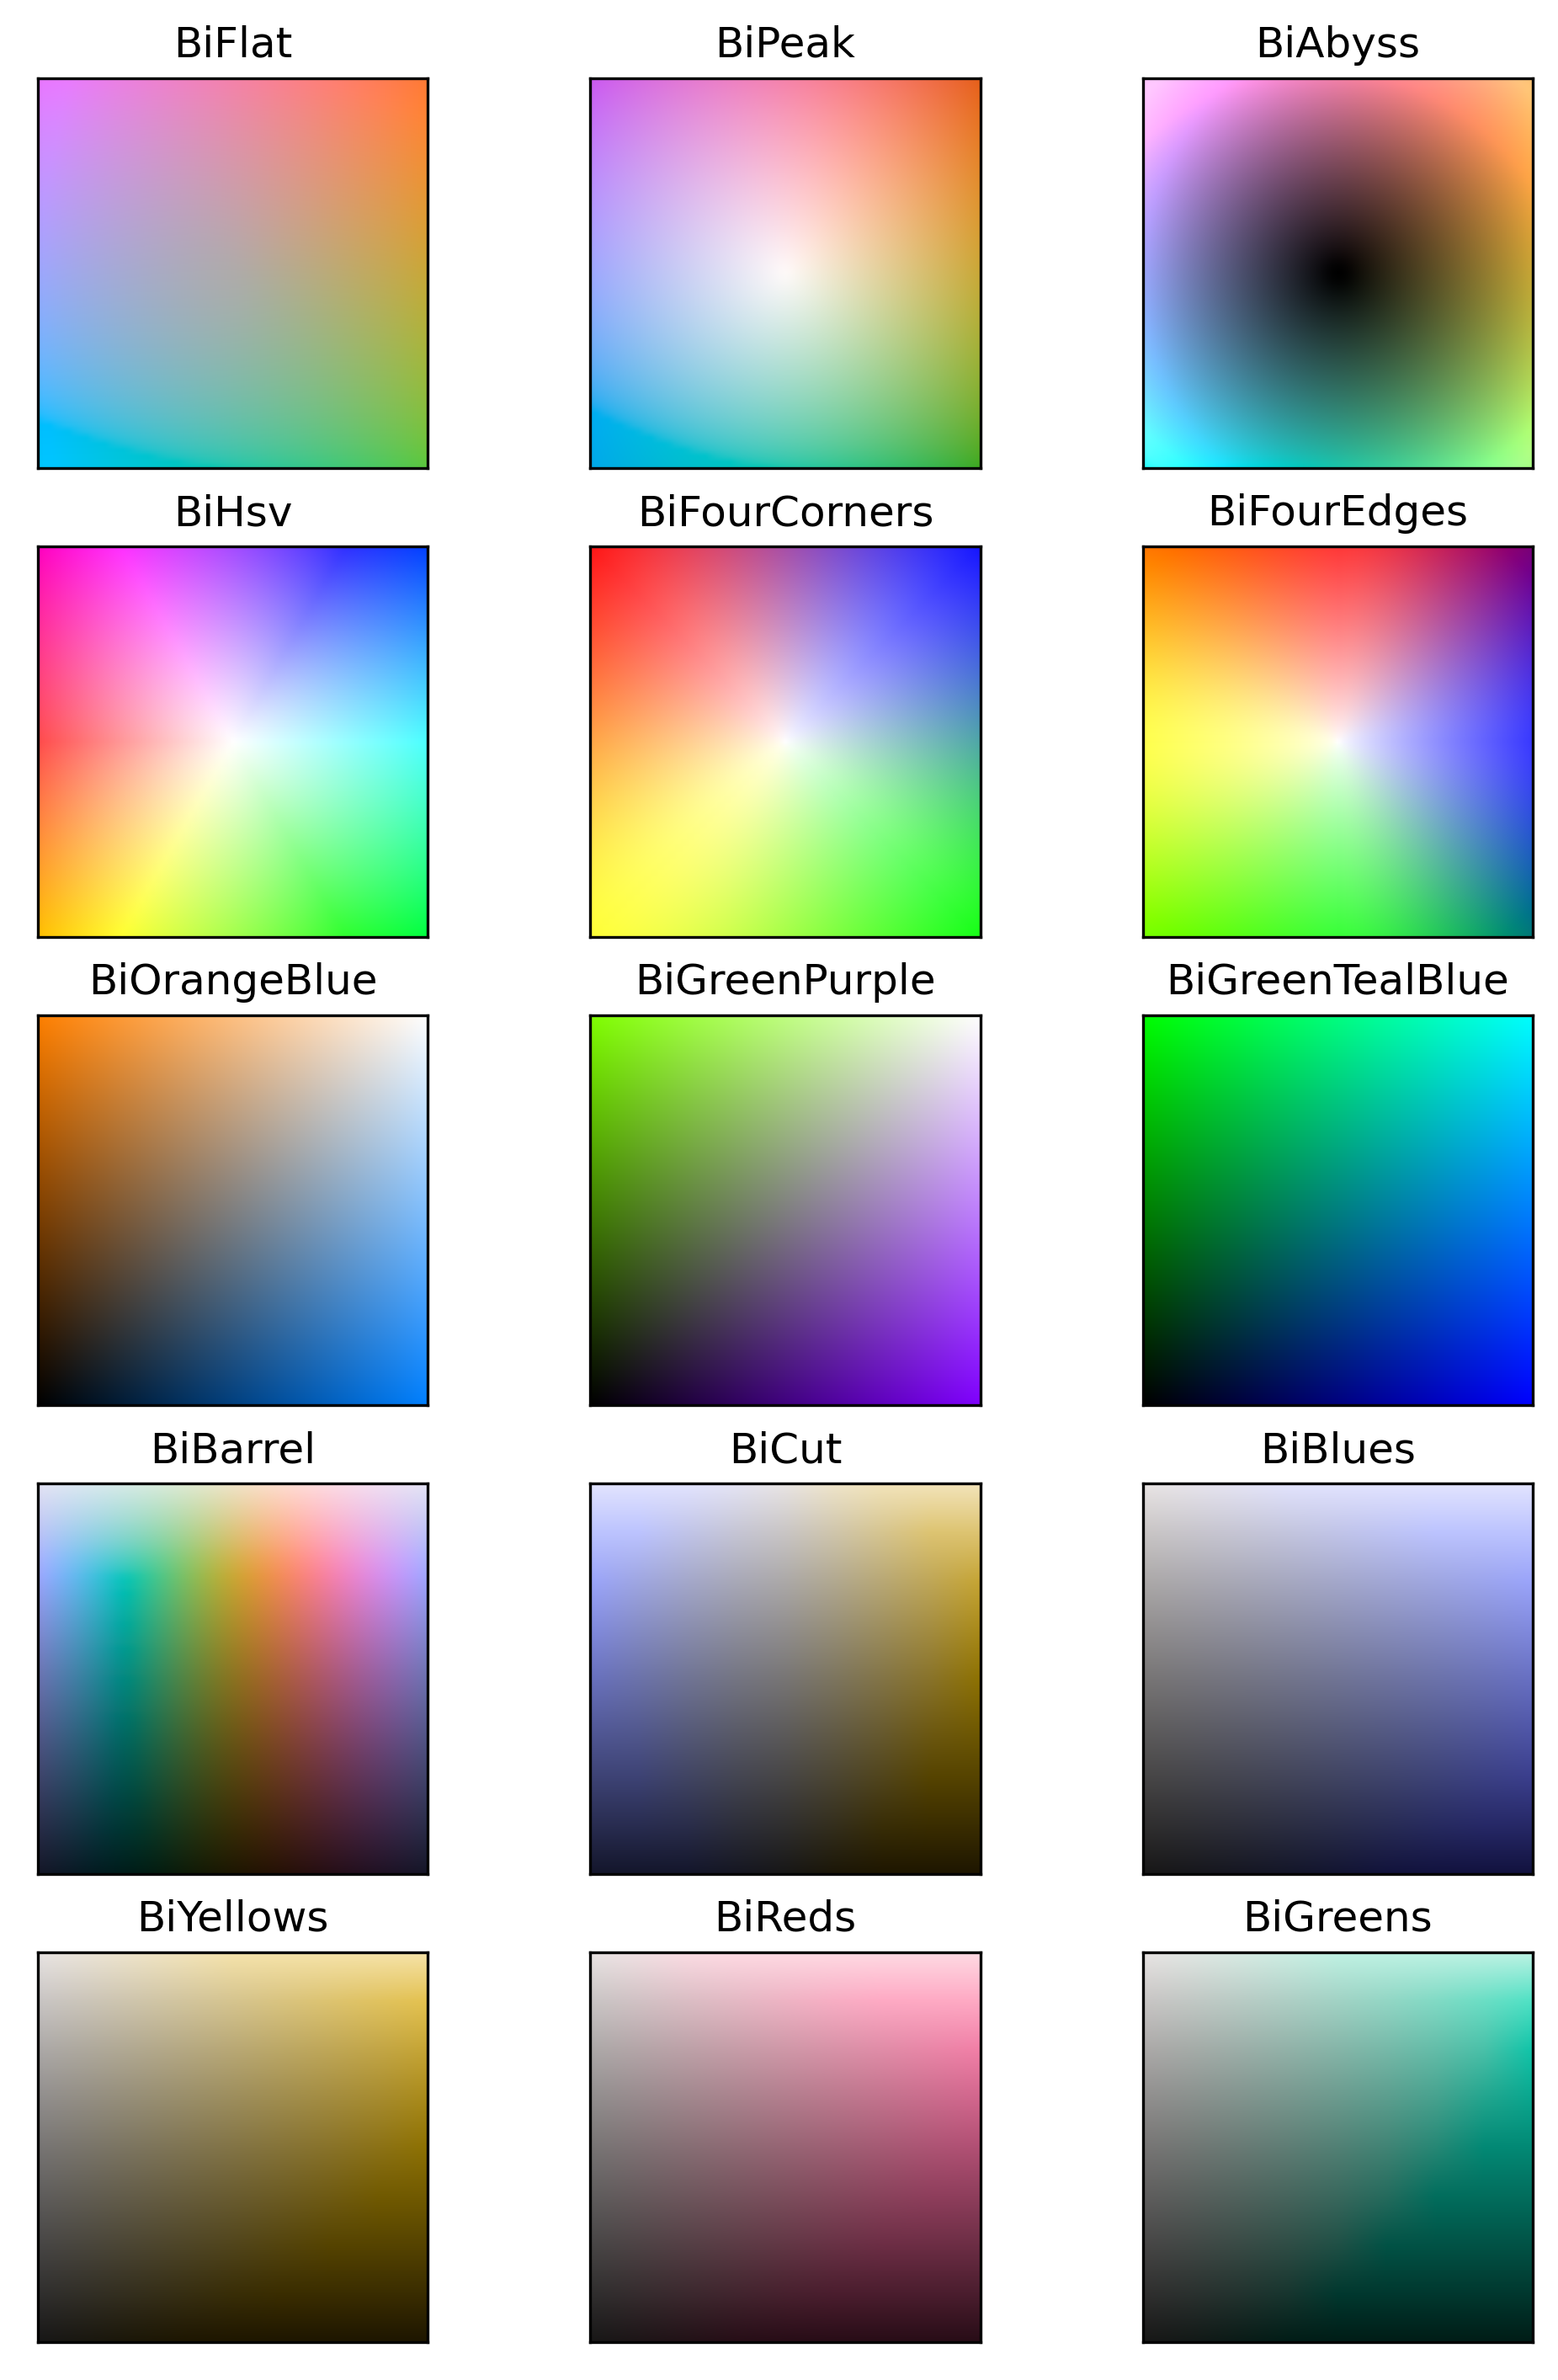

In [7]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.transforms import Affine2D
fig, axes = plt.subplots(5,3, figsize = (8,19*5/8), dpi = 300)
axes = axes.ravel()

reconstructed = []
for i, name in enumerate(_cm_bivar.cmaps.keys()):
    s = _cm_bivar.cmaps[name].shape
    print(name, s)
    patch = np.empty((s[0], s[1], 4))
    patch[:,:,:3] = _cm_bivar.cmaps[name]
    patch[:,:,3] = 1
    transform = Affine2D().translate(-0.50,-0.50).scale(256/(s[0]-1),256/(s[0]-1))
    lut = np.empty((256,256,4))
    matplotlib._image.resample(patch, lut, transform, 1)
    axes[i].imshow(lut, origin = 'lower')
    axes[i].set_title(name)
    reconstructed.append(lut)
    
for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
fig.patch.set_facecolor('white')
fig.savefig(f'Bi_reconstructed.png')

# compare

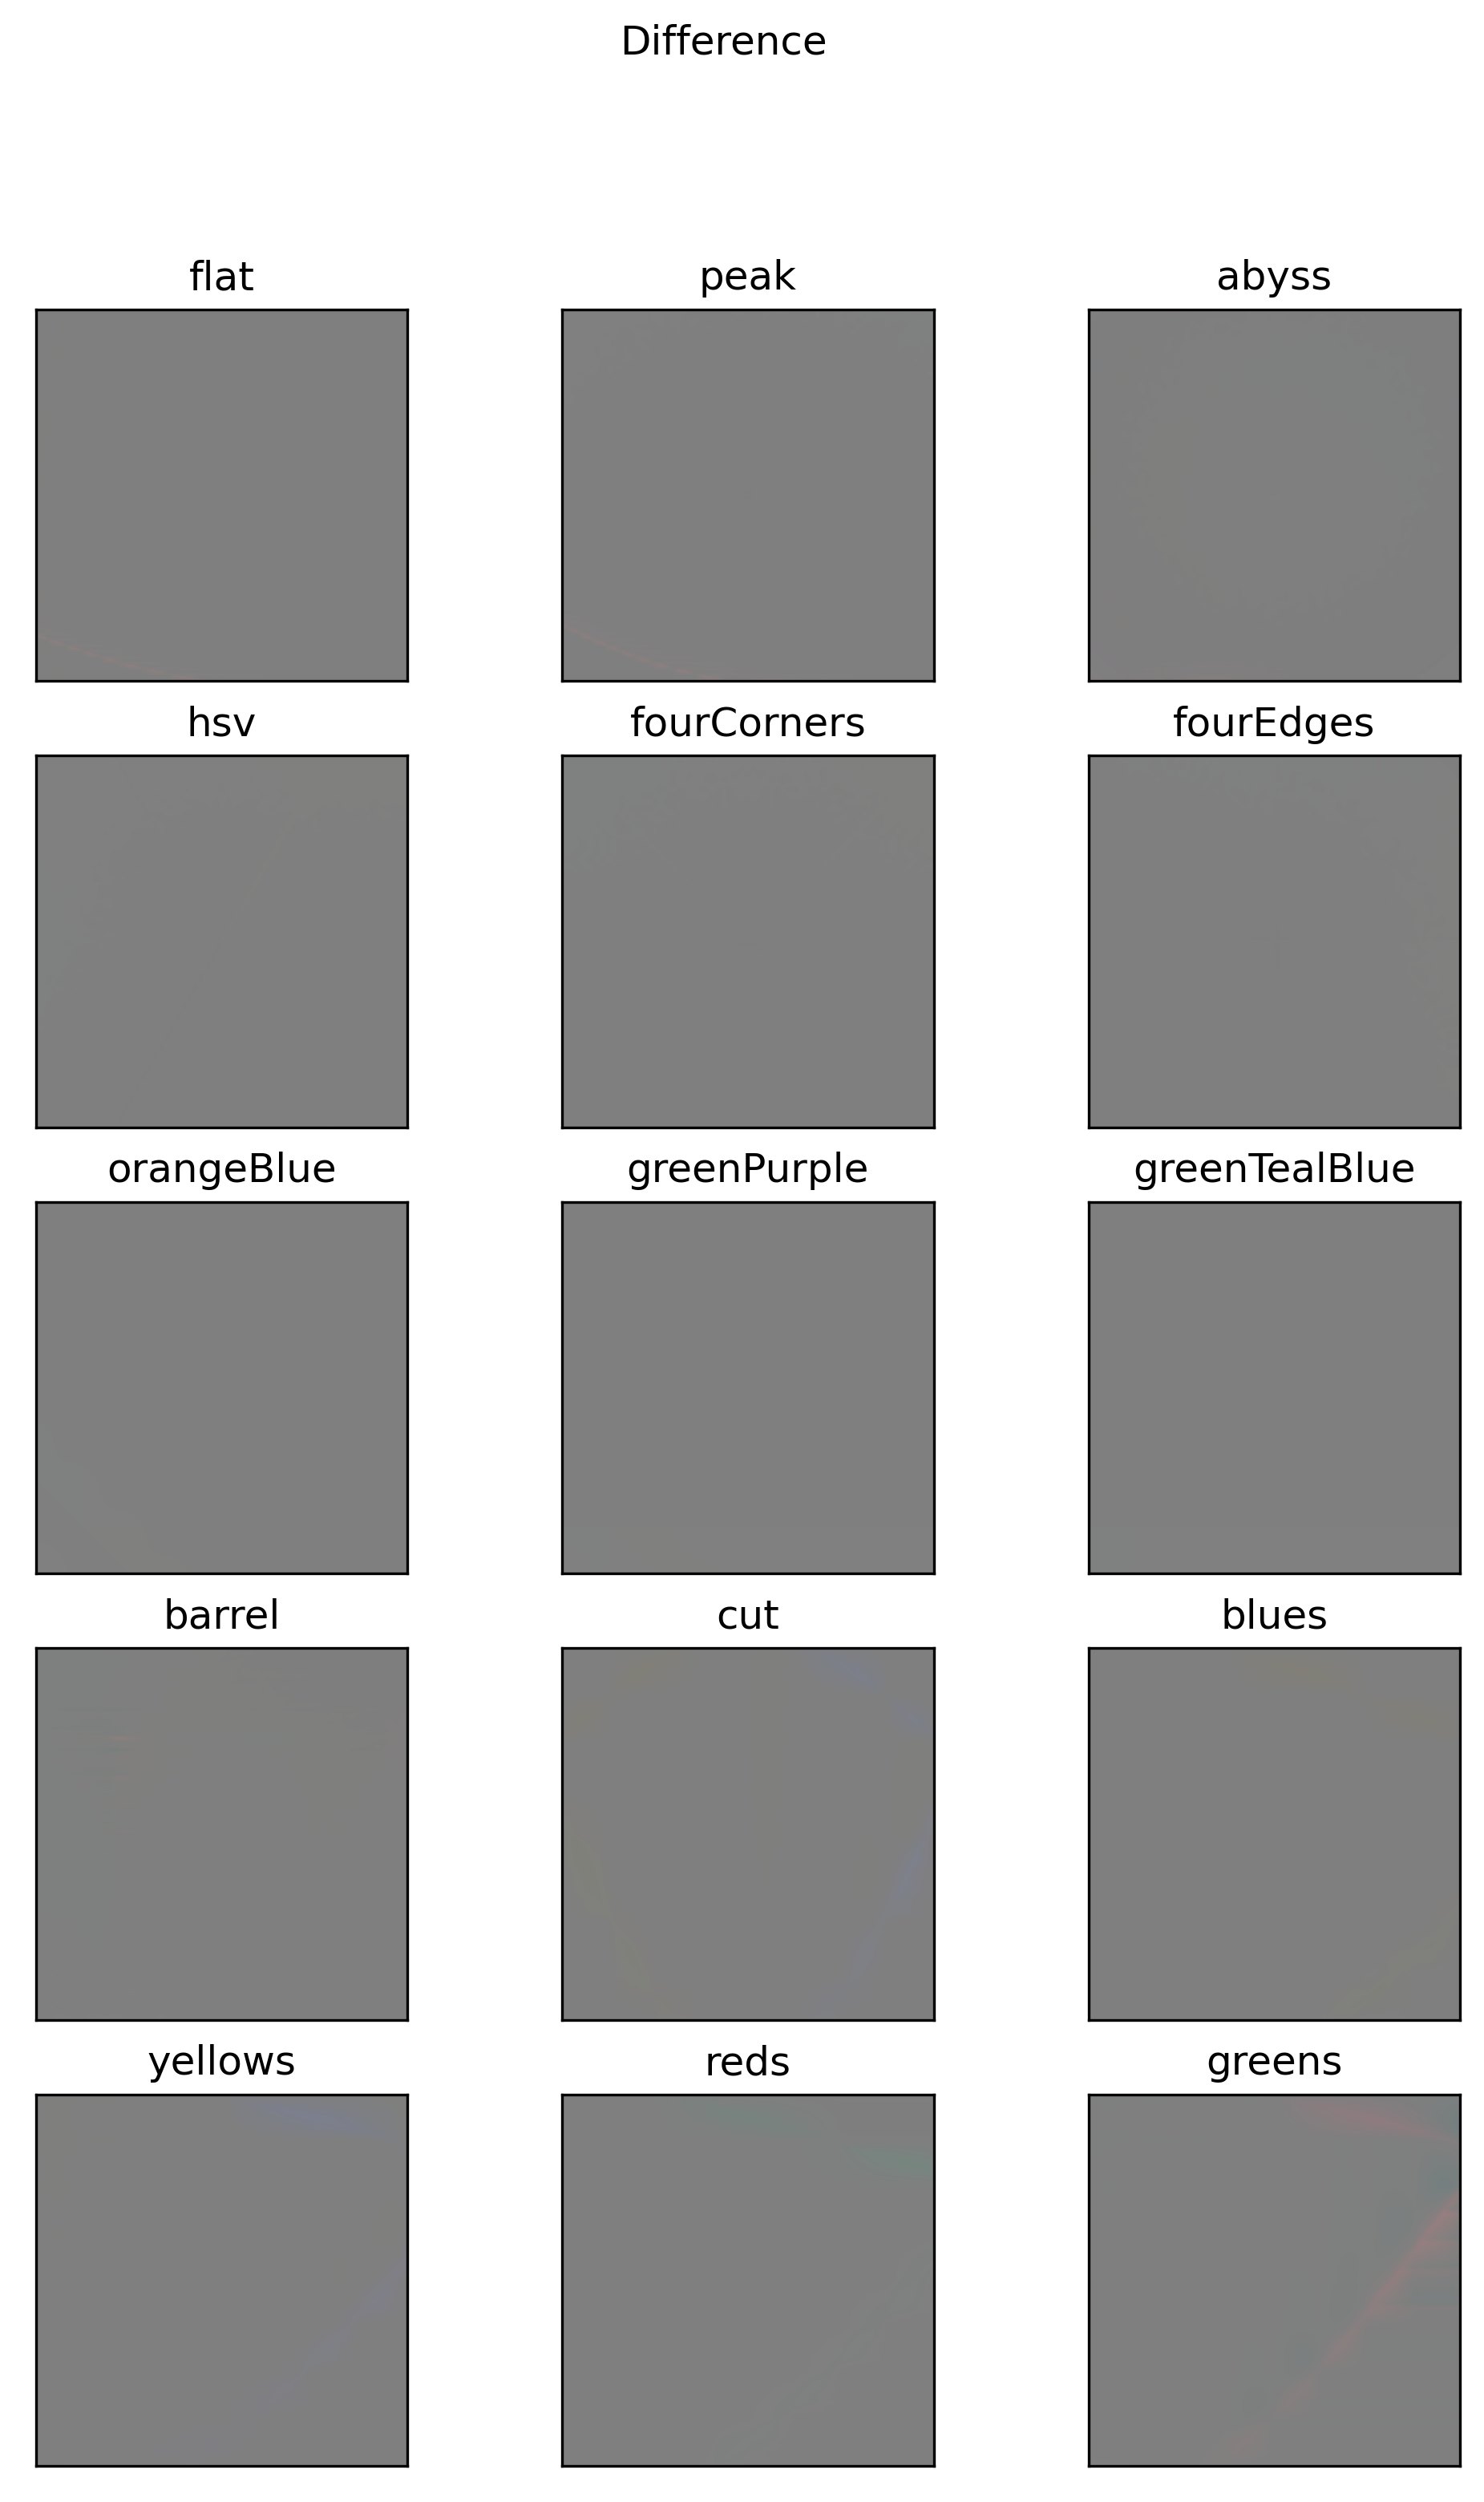

In [8]:
# reference image
fig, axes = plt.subplots(5,3, figsize = (8,19*5/8), dpi = 300)
axes = axes.ravel()


for i, name in enumerate(names):
    axes[i].imshow((reconstructed[i][:,:,:3] - references[i])+0.5, origin = 'lower')
    axes[i].set_title(name)
fig.suptitle('Difference')
    
for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
fig.patch.set_facecolor('white')
fig.patch.set_facecolor('white')
fig.savefig(f'Bi_diff.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


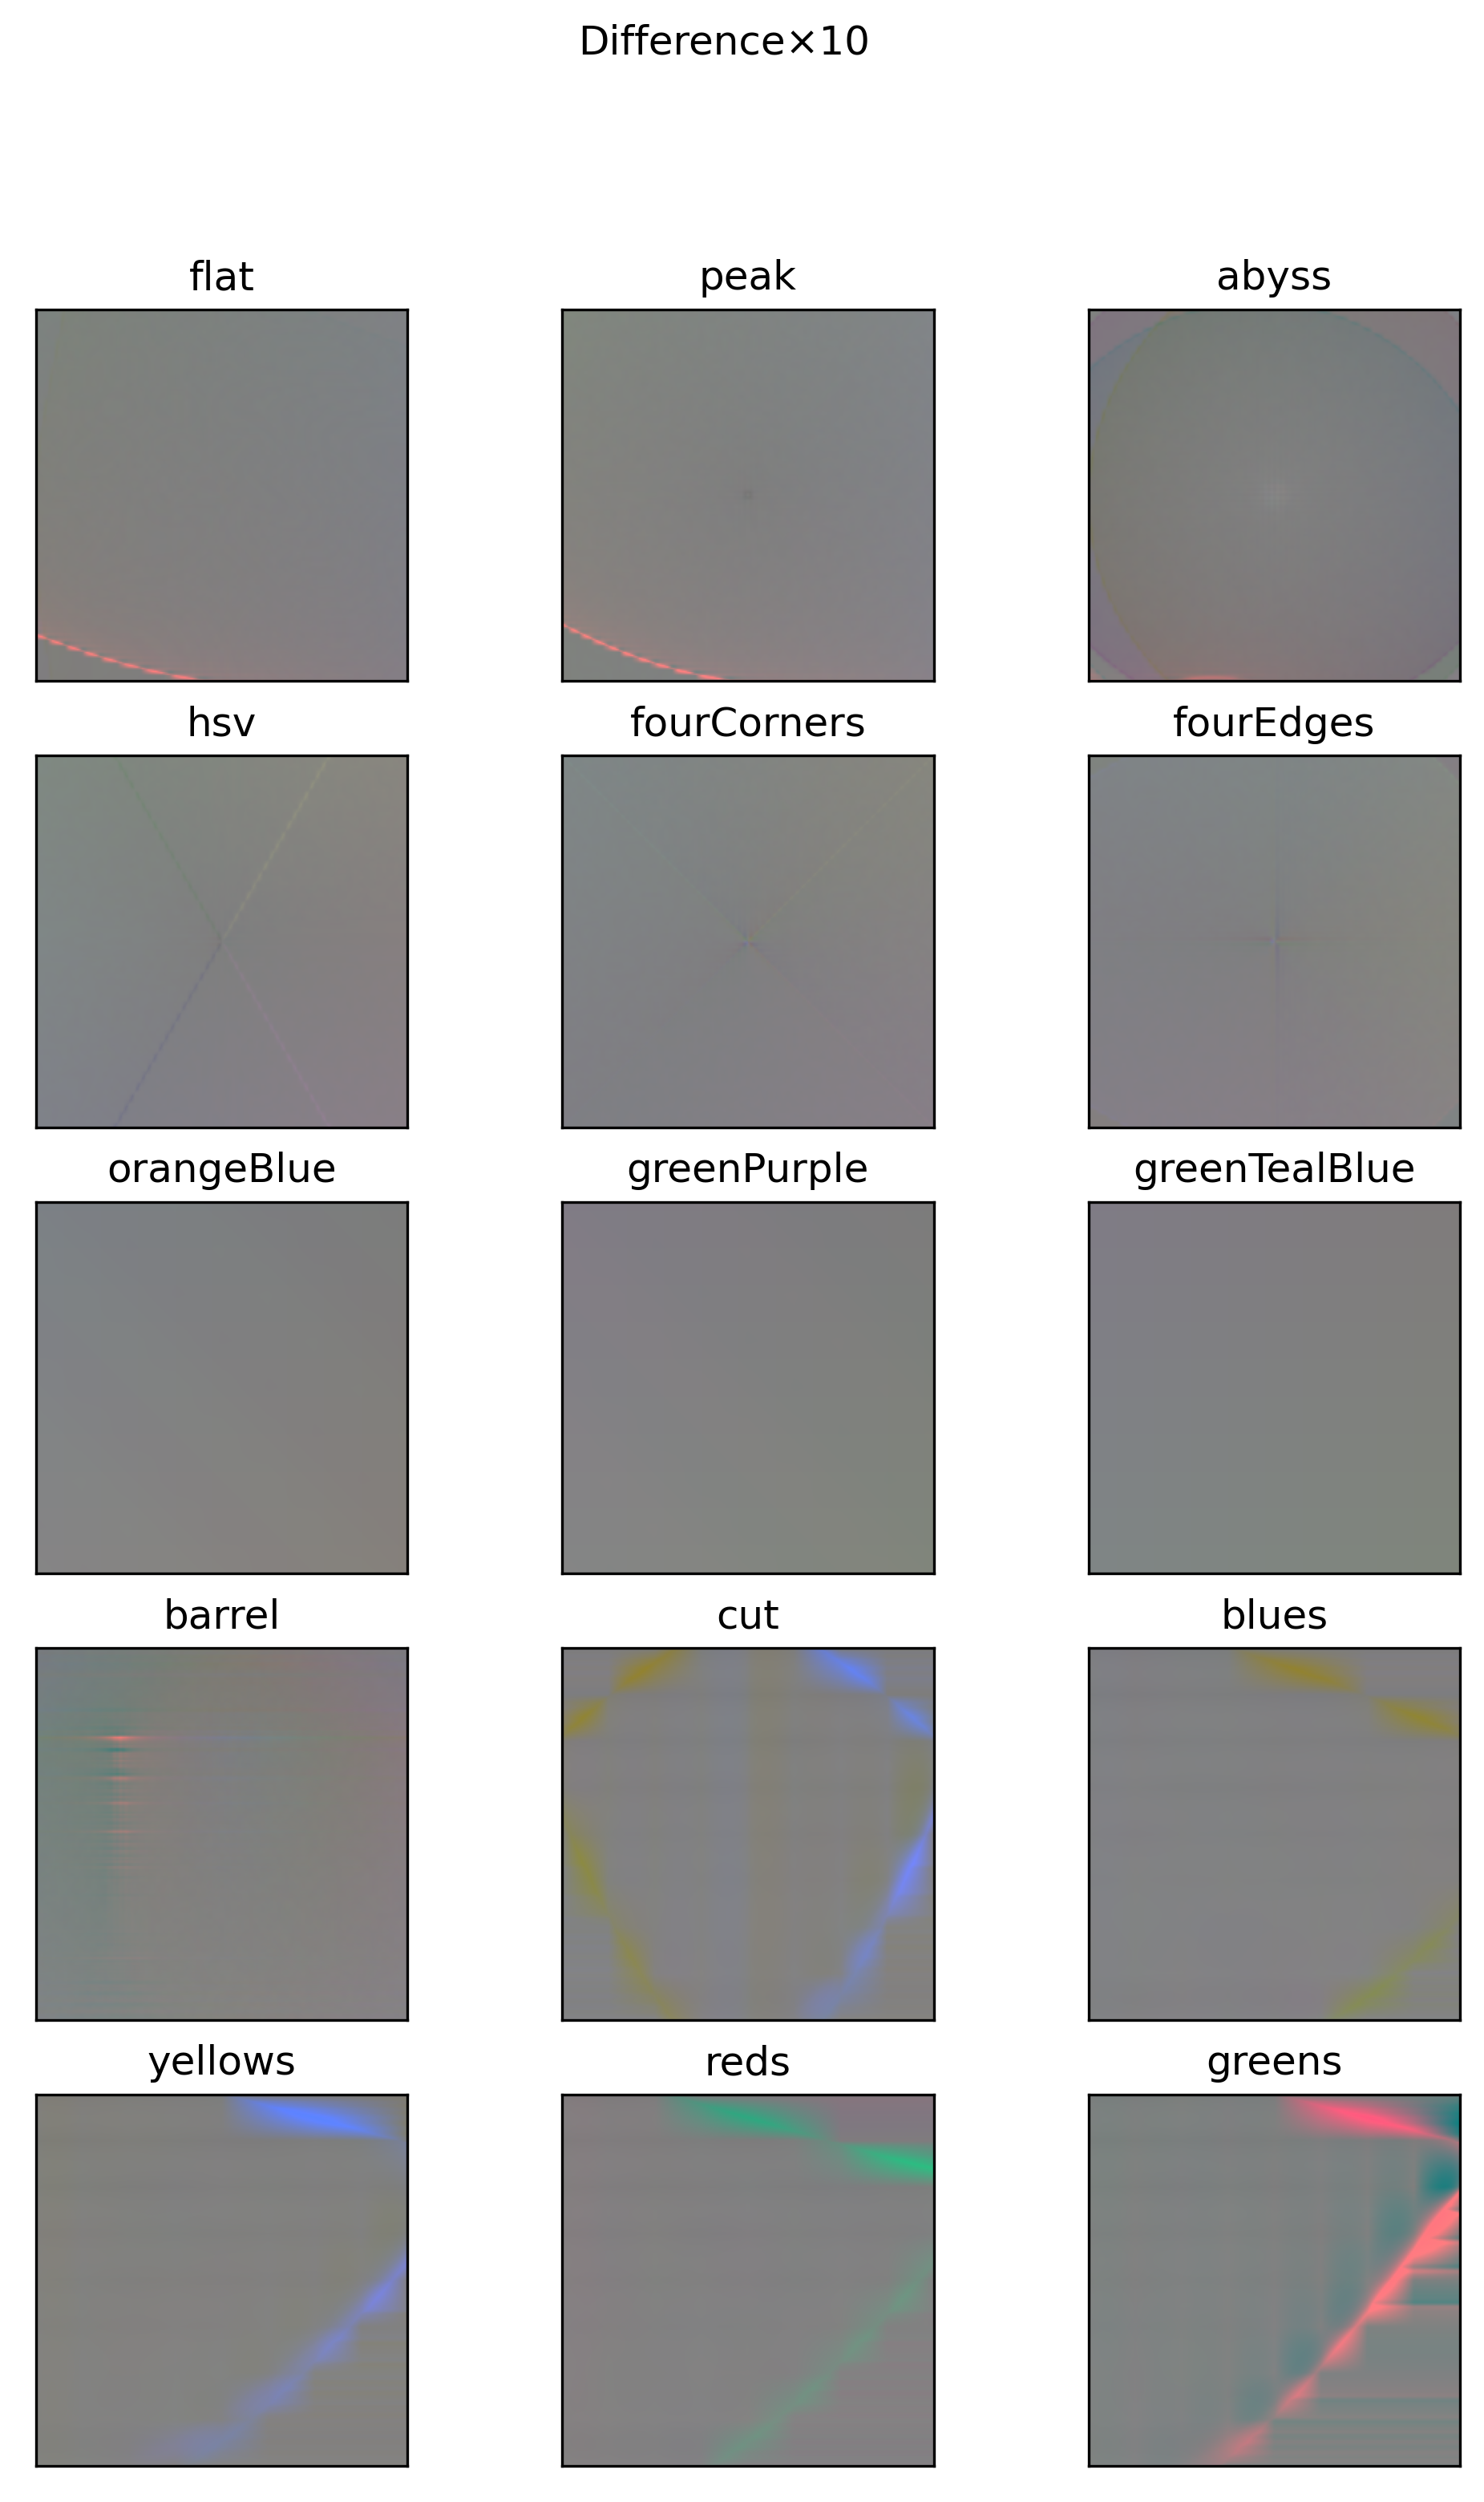

In [9]:
# reference image
fig, axes = plt.subplots(5,3, figsize = (8,19*5/8), dpi = 300)
axes = axes.ravel()


for i, name in enumerate(names):
    axes[i].imshow((reconstructed[i][:,:,:3] - references[i])*10+0.5, origin = 'lower')
    axes[i].set_title(name)
fig.suptitle('Difference×10')
    
for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
fig.patch.set_facecolor('white')
fig.patch.set_facecolor('white')
fig.savefig(f'Bi_diffx10.png')